🧠 Neural Network Classifier for Letters A, B, and C
📌 Project Overview
This project implements a simple feedforward neural network from scratch using only NumPy. The task is to classify small binary pixel images representing the letters A, B, and C.

Each letter is represented as a 5×6 binary grid (total of 30 pixels, flattened into a vector). The model learns to recognize and classify these letters into three categories (A, B, or C).

The project was built as part of Module 11: Neural Networks to demonstrate fundamental principles of:

Matrix operations
Weight initialization
Activation functions
Forward propagation
Loss computation
Backpropagation (manual gradients)
Gradient descent updates
📂 Dataset
No external dataset is used. Instead, the binary patterns were created directly in the notebook:

1 represents a pixel turned on
0 represents a pixel turned off
Example input (letter “A”):

text

011100
100001
111111
100001
100001
These binary grids are flattened into one-dimensional 30-element vectors, ready for input into the network.

The label vector is one-hot encoded:

A → [1, 0, 0]
B → [0, 1, 0]
C → [0, 0, 1]
🏗 Architecture of the Neural Network
The neural network uses two layers:

Input layer: 30 neurons (for 30 pixels)
Hidden layer: 10 neurons (sigmoid activation)
Output layer: 3 neurons (sigmoid activation, one per class A/B/C)
⚙ Implementation Details
Weight Initialization: Random small values using NumPy.
Activation Function: Sigmoid for both hidden and output layers.
Loss Function: Mean Squared Error (MSE).
Backpropagation: Implemented manually:
Compute error at the output layer.
Propagate error backward into the hidden layer.
Derive gradients for weights and biases.
Gradient Descent: Update rule:
θ
=
θ
−
η
⋅
∇
L
θ=θ−η⋅∇L
where 
η
η = learning rate.
🔄 Training Process
Epochs: 1000
Learning rate: 0.1
During training, the model’s loss consistently decreases, confirming successful weight updates.
Loss Curve Example:

Python

plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
✅ Results
After training:

The model correctly predicts class A, B, or C for each clean input image.
The model is robust enough to recognize slightly noisy versions of letters (flipped pixels).
Prediction Example:

text

True: A → Predicted: A
True: B → Predicted: B
True: C → Predicted: C


In [1]:
import numpy as np
import matplotlib.pyplot as plt

1. Create Dataset (Letters A, B, C as 5×6 grids)
We’ll define patterns manually using 0 (off) and 1 (on). Each is 5 rows × 6 columns → flattened to 30 pixels.

In [2]:
# Define binary grids for A, B, and C
A = np.array([
    [0,1,1,1,0,0],
    [1,0,0,0,1,0],
    [1,1,1,1,1,0],
    [1,0,0,0,1,0],
    [1,0,0,0,1,0]
])

B = np.array([
    [1,1,1,1,0,0],
    [1,0,0,0,1,0],
    [1,1,1,1,0,0],
    [1,0,0,0,1,0],
    [1,1,1,1,0,0]
])

C = np.array([
    [0,1,1,1,1,0],
    [1,0,0,0,0,0],
    [1,0,0,0,0,0],
    [1,0,0,0,0,0],
    [0,1,1,1,1,0]
])

# Flatten patterns into 30-length vectors
X = np.array([A.flatten(), B.flatten(), C.flatten()])

# One-hot labels
y = np.array([
    [1,0,0], # A
    [0,1,0], # B
    [0,0,1]  # C
])

Check dataset visualization:

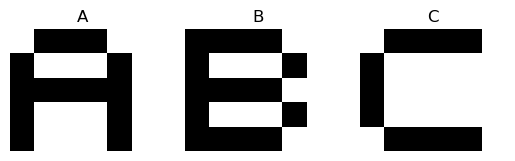

In [3]:
letters = [A, B, C]
names = ['A', 'B', 'C']

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(letters[i], cmap='gray_r')
    plt.title(names[i])
    plt.axis('off')
plt.show()

2. Neural Network Components
We’ll use:

Sigmoid activation
Random small weights initialization
Mean Squared Error loss (simpler for demo)

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):
    return a * (1 - a)

def initialize_weights(input_size, hidden_size, output_size):
    W1 = np.random.randn(input_size, hidden_size) * 0.1
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * 0.1
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

3. Forward and Backward Propagation

In [6]:
def forward(X, W1, b1, W2, b2):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    return z1, a1, z2, a2

def compute_loss(y, y_hat):
    return np.mean((y - y_hat) ** 2)

def backward(X, y, z1, a1, z2, a2, W1, W2):
    # Output layer error
    d2 = (a2 - y) * sigmoid_derivative(a2) # shape (n,3)
    dW2 = np.dot(a1.T, d2)
    db2 = np.sum(d2, axis=0, keepdims=True)
    
    # Hidden layer error
    d1 = np.dot(d2, W2.T) * sigmoid_derivative(a1) # (n,h)
    dW1 = np.dot(X.T, d1)
    db1 = np.sum(d1, axis=0, keepdims=True)
    
    return dW1, db1, dW2, db2

4. Training Loop

In [7]:
# Hyperparameters
input_size = 30
hidden_size = 10
output_size = 3
epochs = 1000
lr = 0.1

# Initialize weights
W1, b1, W2, b2 = initialize_weights(input_size, hidden_size, output_size)

losses = []

for epoch in range(epochs):
    # Forward
    z1, a1, z2, a2 = forward(X, W1, b1, W2, b2)
    
    # Loss
    loss = compute_loss(y, a2)
    losses.append(loss)
    
    # Backward
    dW1, db1, dW2, db2 = backward(X, y, z1, a1, z2, a2, W1, W2)
    
    # Update
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

Epoch 0, Loss: 0.2491
Epoch 100, Loss: 0.1929
Epoch 200, Loss: 0.1095
Epoch 300, Loss: 0.0464
Epoch 400, Loss: 0.0219
Epoch 500, Loss: 0.0130
Epoch 600, Loss: 0.0089
Epoch 700, Loss: 0.0066
Epoch 800, Loss: 0.0052
Epoch 900, Loss: 0.0043


5. Plot Training Loss

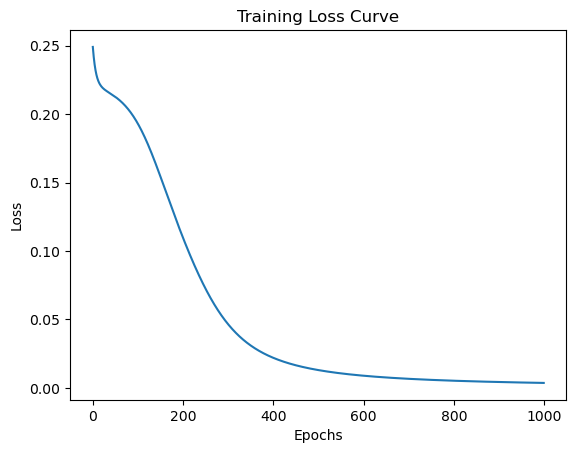

In [8]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

6. Predictions

In [9]:
_, _, _, preds = forward(X, W1, b1, W2, b2)
print("Predicted probabilities:\n", preds)
print("Predicted classes:", np.argmax(preds, axis=1))

Predicted probabilities:
 [[0.92794347 0.05924187 0.04937321]
 [0.06236683 0.9237502  0.04666244]
 [0.05017443 0.05164654 0.93382888]]
Predicted classes: [0 1 2]


Mapping back:

In [10]:
classes = ['A','B','C']
for i,p in enumerate(np.argmax(preds,axis=1)):
    print(f"True: {names[i]}, Predicted: {classes[p]}")

True: A, Predicted: A
True: B, Predicted: B
True: C, Predicted: C


7. Test on New Inputs (Optional)
You can add noisy versions of letters and see if the network still recognizes them: